In [1]:
import numpy as np
import os
import sys
sys.path.append('../')
import cv2
from utils import load_datasets
from copy import deepcopy
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from keras.api.models import Model
from keras.api.layers import Dense, Conv2D, BatchNormalization, LeakyReLU, Flatten, Softmax, Activation, MaxPool2D


In [2]:
ds01_train, ds01_val, ds02 = load_datasets(
    datasets_dir='../datasets/Movies',
    multi_class=False,
    read_from_stubs=True,
    stub_path='../datasets/stub_bin',
    save_stub=False
)

In [3]:
y_train = np.zeros(ds01_train.shape[0])
y_train[ds01_train.shape[0]//2:] = 1
y_train = y_train.reshape((-1,1))

In [4]:
y_val = np.zeros(ds01_val.shape[0])
y_val[ds01_val.shape[0]//2:] = 1
y_val = y_val.reshape((-1,1))

In [5]:
y_test = np.zeros(ds02.shape[0])
y_val[ds02.shape[0]//2:] = 1
y_test = y_test.reshape((-1,1))

In [6]:
x_train , y_train = shuffle(ds01_train, y_train)
x_val , y_val = shuffle(ds01_val, y_val)
x_test , y_test = shuffle(ds02, y_test)


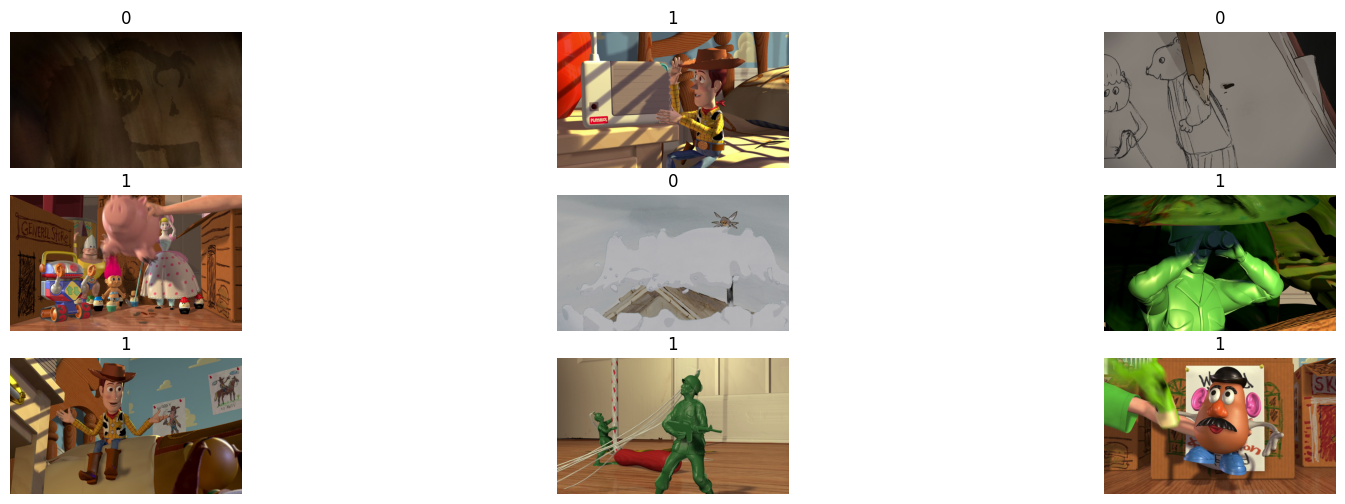

In [7]:
ind = np.random.permutation(x_train.shape[0])
plt.figure(figsize=(20,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i, :, :, ::-1]), plt.title(f'{int(y_train[i][0])}'), plt.axis('off')

In [8]:
cv2.imshow('', ds01_train[399])
cv2.waitKey(0)
cv2.destroyAllWindows()